# Data Transformation
In this notebook we will build a regression model to to predict price.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Loading the data

In [2]:
dfAll = pd.read_csv('data/cleaned.csv')
df = dfAll.copy().query('10**5.2 <= price <= 10**6.2').query('bedrooms < 10')

## Data transformation

In [3]:
df['log_price'] = df['price'].apply(np.log10)
df['ft_living'] = df['sqft_living'].apply(np.sqrt)
df['ft_living15'] = df['sqft_living15'].apply(np.sqrt)
df['log_sqft_lot'] = df['sqft_lot'].apply(np.log10)
Z = pd.get_dummies(df['zipcode'], prefix='zip',drop_first=False)

## Selecting variables for regression

In [8]:
input_variables = ['ft_living15', 'grade']
output_variable = 'log_price'
X = pd.concat([df[input_variables], Z], axis=1)
y = df[output_variable]

## Making test-train split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16716 4179 16716 4179


## Visualizing selected variables

In [10]:
#sns.pairplot(pd.concat([X_train,y_train], axis=1))

## Building a model

In [21]:
X1_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X1_train, hasconst=True).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     892.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:08:26   Log-Likelihood:                 16199.
No. Observations:               16716   AIC:                        -3.225e+04
Df Residuals:                   16644   BIC:                        -3.170e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7028      0.006    771.765      0.000       4.691       4.715
ft_living15     0.0091      0.000     58.885      0.000       0.009       0.009
grade           0.0649      0.001     69.598      0.000       0.063       0.067
zip_98001      -0.1326      0.006    -24.102      0.000      -0.143      -0.122
zip_98002      -0.1172      0.007    -15.718      0.000      -0.132      -0.103
zip_98003      -0.1320      0.006    -21.460      0.000      -0.144      -0.120
zip_98004       0.3074      0.007     44.071      0.000       0.294       0.321
zip_98005       0.1773      0.008     22.674      0.000       0.162       0.193
zip_98006       0.1262      0.005     25.795      0.000       0.117       0.136
zip_98007       0.1377      0.009     15.757      0.000       0.121       0.155
zip_98008       0.1515      0.006     23.333      0.000       0.139       0.164
zip_98010       0.0091      0.010      0.886      0.376      -0.011       0.029
zip_98011       0.0427      0.007      5.789      0.000       0.028       0.057
zip_98014       0.0359      0.010      3.757      0.000       0.017       0.055
zip_98019       0.0075      0.008      1.001      0.317      -0.007       0.022
zip_98022      -0.0794      0.007    -11.858      0.000      -0.093      -0.066
zip_98023      -0.1516      0.005    -32.362      0.000      -0.161      -0.142
zip_98024       0.0770      0.012      6.502      0.000       0.054       0.100
zip_98027       0.0773      0.005     14.922      0.000       0.067       0.087
zip_98028       0.0340      0.006      5.601      0.000       0.022       0.046
zip_98029       0.0921      0.006     15.972      0.000       0.081       0.103
zip_98030      -0.1202      0.007    -18.282      0.000      -0.133      -0.107
zip_98031      -0.1103      0.006    -17.852      0.000      -0.122      -0.098
zip_98032      -0.1365      0.009    -14.748      0.000      -0.155      -0.118
zip_98033       0.1965      0.005     38.134      0.000       0.186       0.207
zip_98034       0.0849      0.004     19.012      0.000       0.076       0.094
zip_98038      -0.0685      0.004    -16.085      0.000      -0.077      -0.060
zip_98039       0.4009      0.026     15.282      0.000       0.349       0.452
zip_98040       0.2407      0.007     35.887      0.000       0.228       0.254
zip_98042      -0.1070      0.004    -23.878      0.000      -0.116      -0.098
zip_98045       0.0158      0.007      2.297      0.022       0.002       0.029
zip_98052       0.1186      0.004     27.501      0.000       0.110       0.127
zip_98053       0.1135      0.005     21.999      0.000       0.103       0.124
zip_98055      -0.0755      0.006    -11.933      0.000      -0.088      -0.063
zip_98056       0.0113      0.005      2.210      0.027       0.001       0.021
zip_98058      -0.0659      0.005    -13.32

## Model validation

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(Z, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [20895, 16716]

In [15]:
print(linreg.intercept_, linreg.coef_ )

0.0 [0.00911959 0.06488327 4.57022046 4.58563015 4.57083599 5.01019791
 4.88010413 4.82903959 4.84054408 4.85431045 4.71197672 4.74553441
 4.73871935 4.71036745 4.62343375 4.55128697 4.77986782 4.78013434
 4.73681693 4.79496931 4.58268903 4.59252179 4.56632477 4.8993418
 4.78777401 4.63434506 5.10372119 4.94350798 4.59588883 4.71863714
 4.82148627 4.81632745 4.62734939 4.71410015 4.63699024 4.70836354
 4.73567315 4.80479491 4.77009196 4.78146063 4.79396242 4.75231189
 4.58177974 4.94093426 4.90652528 4.96532576 4.71280939 4.9053379
 4.7272776  4.97440145 4.97288817 4.91429158 4.90046043 4.9117576
 4.76327774 4.96717437 4.88370427 4.80673293 4.80690936 4.74995194
 4.85340897 4.84907093 4.72598439 4.62629992 4.74735407 4.7367003
 4.61878031 4.82866984 4.65660162 4.62522717 4.6202988  4.92033755]


In [16]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(10**y_train, 10**y_hat_train)
test_mse = mean_squared_error(10**y_test, 10**y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 122993.54973226032
Test Root Mean Squarred Error: 123054.09987417952


Text(0, 0.5, 'Price')

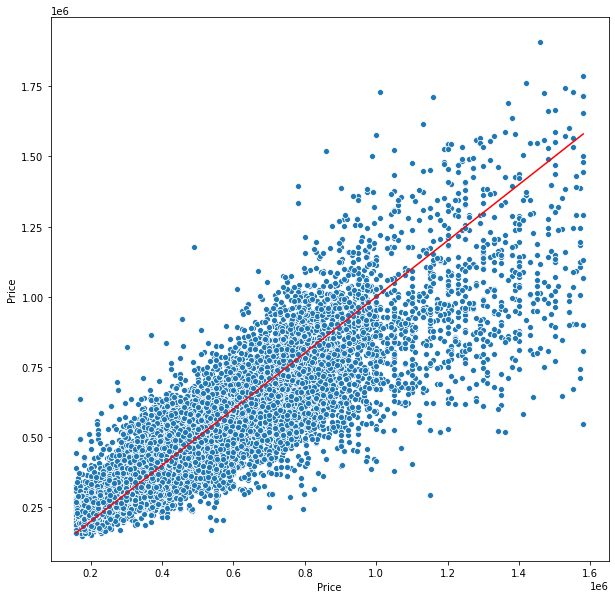

In [17]:
plt.figure(figsize=(10,10))'bedrooms', 'condition', 'waterfront'
sns.scatterplot(10**y_train, 10**y_hat_train)
sns.lineplot([10**y_train.min(), 10**y_train.max()], [10**y_train.min(), 10**y_train.max()], color='red')
plt.xlabel('Price')
plt.ylabel('Price')

Text(0, 0.5, 'Percent Error')

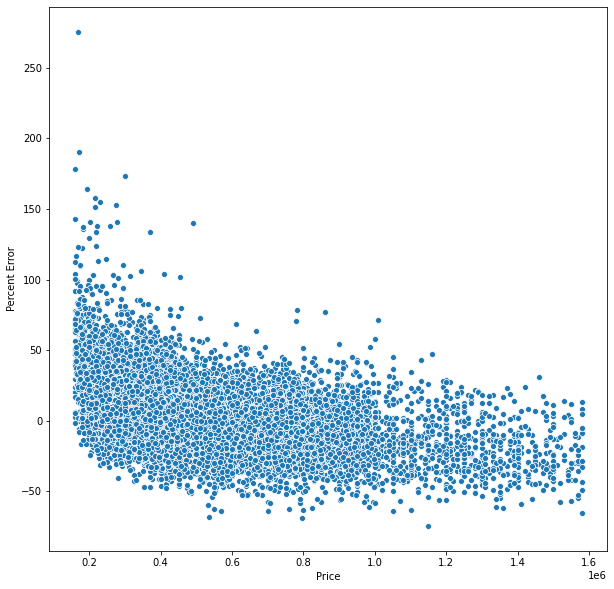

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(10**y_train, 100*(10**y_hat_train - 10**y_train)/10**y_train )
#sns.lineplot([10**y_train.min(), 10**y_train.max()], [10**y_train.min(), 10**y_train.max()], color='red')
plt.xlabel('Price')
plt.ylabel('Percent Error')